In [89]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, fbeta_score, classification_report
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv("data/NEO_v2_refined.csv")
data_res_adasyn = pd.read_csv("data/NEO_v2_refined_res_adasyn.csv")
data_res_smoteenn = pd.read_csv("data/NEO_v2_refined_res_smoteenn.csv")

In [63]:
X = data.drop(columns=["hazardous", "id"])
y = data["hazardous"]

X_res_smoteenn = data_res_smoteenn.drop(columns=["hazardous"])
y_res_smoteenn = data_res_smoteenn["hazardous"]

X_res_adasyn = data_res_adasyn.drop(columns=["hazardous"])
y_res_adasyn = data_res_adasyn["hazardous"]


In [64]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)
X_train_res_smoteenn, X_test_res_smoteenn, y_train_res_smoteenn, y_test_res_smoteenn  = train_test_split (X_res_smoteenn , y_res_smoteenn , test_size=0.33, random_state=42)
X_train_res_adasyn, X_test_res_adasyn, y_train_res_adasyn, y_test_res_adasyn = train_test_split (X_res_adasyn, y_res_adasyn, test_size=0.33, random_state=42)

## Decision tree C4.5

### Original dataset

NO Cost-sensitive 

In [65]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
f2score_tree = fbeta_score(y_test, y_pred, beta=2)

In [66]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.8899786495863358
F2 score: 0.4469538170261681
ROC AUC score: 0.6932302466381816
---------------------------------------------------------


YES Cost-sensitive

In [67]:
decision_tree = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train, y_train) # Cost sensitive learning con "balanced"

y_pred = decision_tree.predict(X_test)
f2score_tree_cost_learning = fbeta_score(y_test, y_pred, beta=2)

In [68]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2, average="micro"), "micro", fbeta_score(y_test, y_pred, beta=2, average="macro"), "macro", fbeta_score(y_test, y_pred, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.8914798505471043
F2 score: 0.8914798505471043 micro 0.6867384264728364 macro 0.8910894465715027 weighted
ROC AUC score: 0.685452955544512
---------------------------------------------------------


### SMOTEENN resampling

NO Cost-sensitive 

In [69]:
decision_tree_res_smoteenn = DecisionTreeClassifier(random_state=0).fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn.predict(X_test_res_smoteenn)
f2score_tree_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [70]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9276103521658543
F2 score: 0.9276103521658543 micro 0.9275054523699052 macro 0.9276117935370962 weighted
ROC AUC score: 0.9275301832042604
---------------------------------------------------------


YES Cost-sensitive

In [71]:
decision_tree_res_smoteenn = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn.predict(X_test_res_smoteenn)
f2score_tree_res_smoteenn_cost_learning = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [72]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9287773735154802
F2 score: 0.9287773735154802 micro 0.9287026993835775 macro 0.9287790523610695 weighted
ROC AUC score: 0.9287435338554015
---------------------------------------------------------


### ADASYN resamble

NO Cost-sensitive


In [73]:
decision_tree_res_adasyn = DecisionTreeClassifier(random_state=0).fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn.predict(X_test_res_adasyn)
f2score_tree_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [74]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9381538796861377
F2 score: 0.9381538796861378 micro 0.9380956520012188 macro 0.9381515845239962 weighted
ROC AUC score: 0.9380808521401336
---------------------------------------------------------


YES Cost-sensitive

In [75]:
decision_tree_res_adasyn = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn.predict(X_test_res_adasyn)
f2score_tree_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [76]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9376271432723046
F2 score: 0.9376271432723045 micro 0.9375705374070908 macro 0.9376250384061346 weighted
ROC AUC score: 0.9375565618219459
---------------------------------------------------------


## Naive Bayes

### Original dataset

In [77]:
bayes = GaussianNB().fit(X_train, y_train)

y_pred = bayes.predict(X_test)
f2score_bayes = fbeta_score(y_test, y_pred, beta=2)

In [78]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.897417934347478
F2 score: 0.0424637203166227
ROC AUC score: 0.5132270427285687
---------------------------------------------------------


### SMOTEENN resampling

In [79]:
bayes_smoteen = GaussianNB().fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = bayes_smoteen.predict(X_test_res_smoteenn)
f2score_bayes_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [80]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.69472094460081
F2 score: 0.69472094460081 micro 0.6904620999410102 macro 0.6931980450397981 weighted
ROC AUC score: 0.6911879622090443
---------------------------------------------------------


### ADASYN resampling

In [81]:
bayes_adasyn = ComplementNB().fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = bayes_adasyn.predict(X_test_res_adasyn)
f2score_bayes_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [82]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="micro"), "micro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="macro"), "macro", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2, average="weighted"), "weighted")
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.5530187445510026
F2 score: 0.5530187445510026 micro 0.5529338951151352 macro 0.5530301263877263 weighted
ROC AUC score: 0.5529515530535236
---------------------------------------------------------


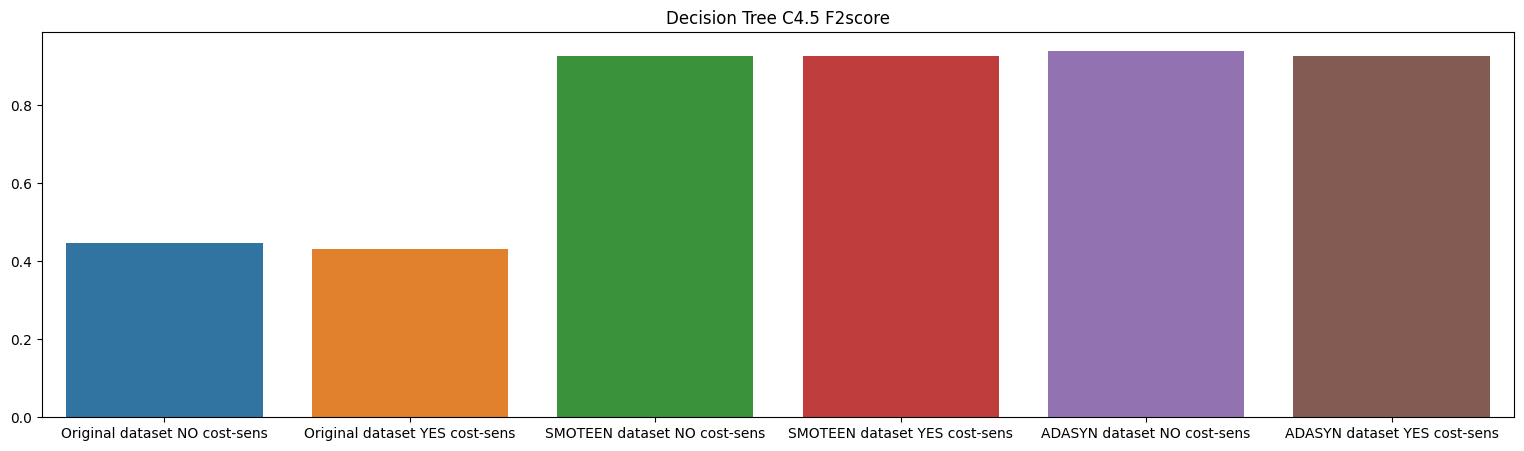

In [100]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(19, 5))
plt.title("Decision Tree C4.5 F2score")
sns.barplot(x=["Original dataset NO cost-sens", "Original dataset YES cost-sens", "SMOTEEN dataset NO cost-sens", "SMOTEEN dataset YES cost-sens", "ADASYN dataset NO cost-sens", "ADASYN dataset YES cost-sens"], y=[f2score_tree, f2score_tree_cost_learning, f2score_tree_res_smoteenn, f2score_tree_res_smoteenn_cost_learning, f2score_tree_res_adasyn,f2score_tree_res_smoteenn_cost_learning])
plt.show()

<AxesSubplot:title={'center':'Naive Bayes F2score'}>

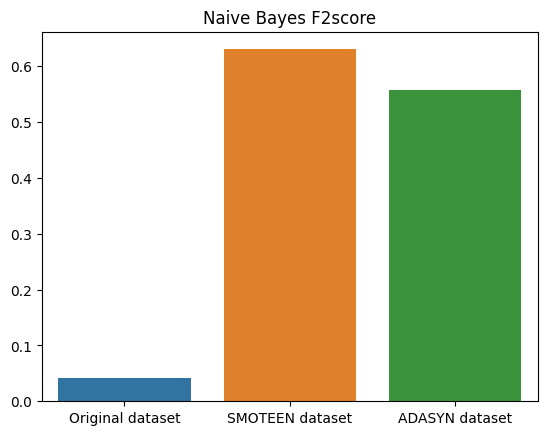

In [101]:
plt.title("Naive Bayes F2score")
sns.barplot(x=["Original dataset", "SMOTEEN dataset","ADASYN dataset"], y=[f2score_bayes, f2score_bayes_res_smoteenn, f2score_bayes_res_adasyn])